<a href="https://www.kaggle.com/code/rishabhbhartiya/2025-ai-job-trends-top-skills?scriptVersionId=243387825" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from collections import Counter, defaultdict
from IPython.display import display, clear_output

In [2]:
df = pd.read_csv("/kaggle/input/global-ai-job-market-and-salary-trends-2025/ai_job_dataset.csv")

In [3]:
df["application_deadline"] = pd.to_datetime(df["application_deadline"])
df["posting_date"] = pd.to_datetime(df["posting_date"])
df = df.drop(columns = "job_id")

In [4]:
skill_list = []
for skill in df["required_skills"]:
    skill_list.append(skill)
all_skills = []
for combo in skill_list:
    skills = [skill.strip() for skill in combo.split(',')]
    all_skills.extend(skills)
skill_counts = Counter(all_skills)
for skill, count in skill_counts.most_common():
    print(f"{skill}: {count}")

Python: 4450
SQL: 3407
TensorFlow: 3022
Kubernetes: 3009
Scala: 2794
PyTorch: 2777
Linux: 2705
Git: 2631
Java: 2578
GCP: 2442
Hadoop: 2419
Tableau: 2341
R: 2311
Computer Vision: 2284
Data Visualization: 2270
Deep Learning: 2189
MLOps: 2164
Spark: 2155
NLP: 2145
Azure: 2144
AWS: 2018
Mathematics: 1943
Docker: 1862
Statistics: 1833


In [5]:
skill_categories = {
    'NLP': 'AI/ML', 'Deep Learning': 'AI/ML', 'Computer Vision': 'AI/ML',
    'TensorFlow': 'AI/ML', 'PyTorch': 'AI/ML', 'MLOps': 'AI/ML',
    
    'SQL': 'Big Data', 'Hadoop': 'Big Data', 'Spark': 'Big Data', 'Scala': 'Big Data',
    
    'AWS': 'Cloud/DevOps', 'Azure': 'Cloud/DevOps', 'GCP': 'Cloud/DevOps',
    'Docker': 'Cloud/DevOps', 'Kubernetes': 'Cloud/DevOps', 'Git': 'Cloud/DevOps', 'Linux': 'Cloud/DevOps',

    'Python': 'Programming', 'Java': 'Programming', 'R': 'Programming',

    'Tableau': 'Visualization', 'Data Visualization': 'Visualization',

    'Statistics': 'Math/Stats', 'Mathematics': 'Math/Stats',
}

def categorize(skill):
    return skill_categories.get(skill, 'Other')

job_skill_counts = defaultdict(Counter)
for _, row in df.iterrows():
    job_title = row["job_title"]
    skills = [skill.strip() for skill in row["required_skills"].split(',')]
    job_skill_counts[job_title].update(skills)
rows = []
for job_title, skills in job_skill_counts.items():
    for skill, count in skills.items():
        rows.append({
            "job_title": job_title,
            "skill": skill,
            "count": count,
            "category": categorize(skill)
        })
skills_df = pd.DataFrame(rows)

job_titles = sorted(skills_df['job_title'].unique())
dropdown = widgets.Dropdown(options=job_titles, description='Job Title:', layout=widgets.Layout(width='50%'))
output = widgets.Output()

def plot_sorted_skills(job_title):
    with output:
        clear_output(wait=True)
        filtered = skills_df[skills_df['job_title'] == job_title].copy()
        filtered.sort_values(by='count', ascending=True, inplace=True)

        fig = px.bar(
            filtered,
            x='count',
            y='skill',
            color='category',
            orientation='h',
            title=f'Skill Counts for "{job_title}"',
            labels={'count': 'Count', 'skill': 'Skill', 'category': 'Category'},
            height=600,
            template='plotly_white',
            color_discrete_sequence=px.colors.qualitative.Set2
        )
        fig.update_layout(
            transition=dict(duration=600, easing='cubic-in-out'),
            margin=dict(l=120, r=40, t=60, b=40),
            legend_title_text='Skill Category',
            yaxis={'categoryorder': 'total ascending'}  # ensures sorting by count
        )
        fig.show()

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        plot_sorted_skills(change['new'])

dropdown.observe(on_change)
display(dropdown, output)
plot_sorted_skills(dropdown.value)

Dropdown(description='Job Title:', layout=Layout(width='50%'), options=('AI Architect', 'AI Consultant', 'AI P…

Output()

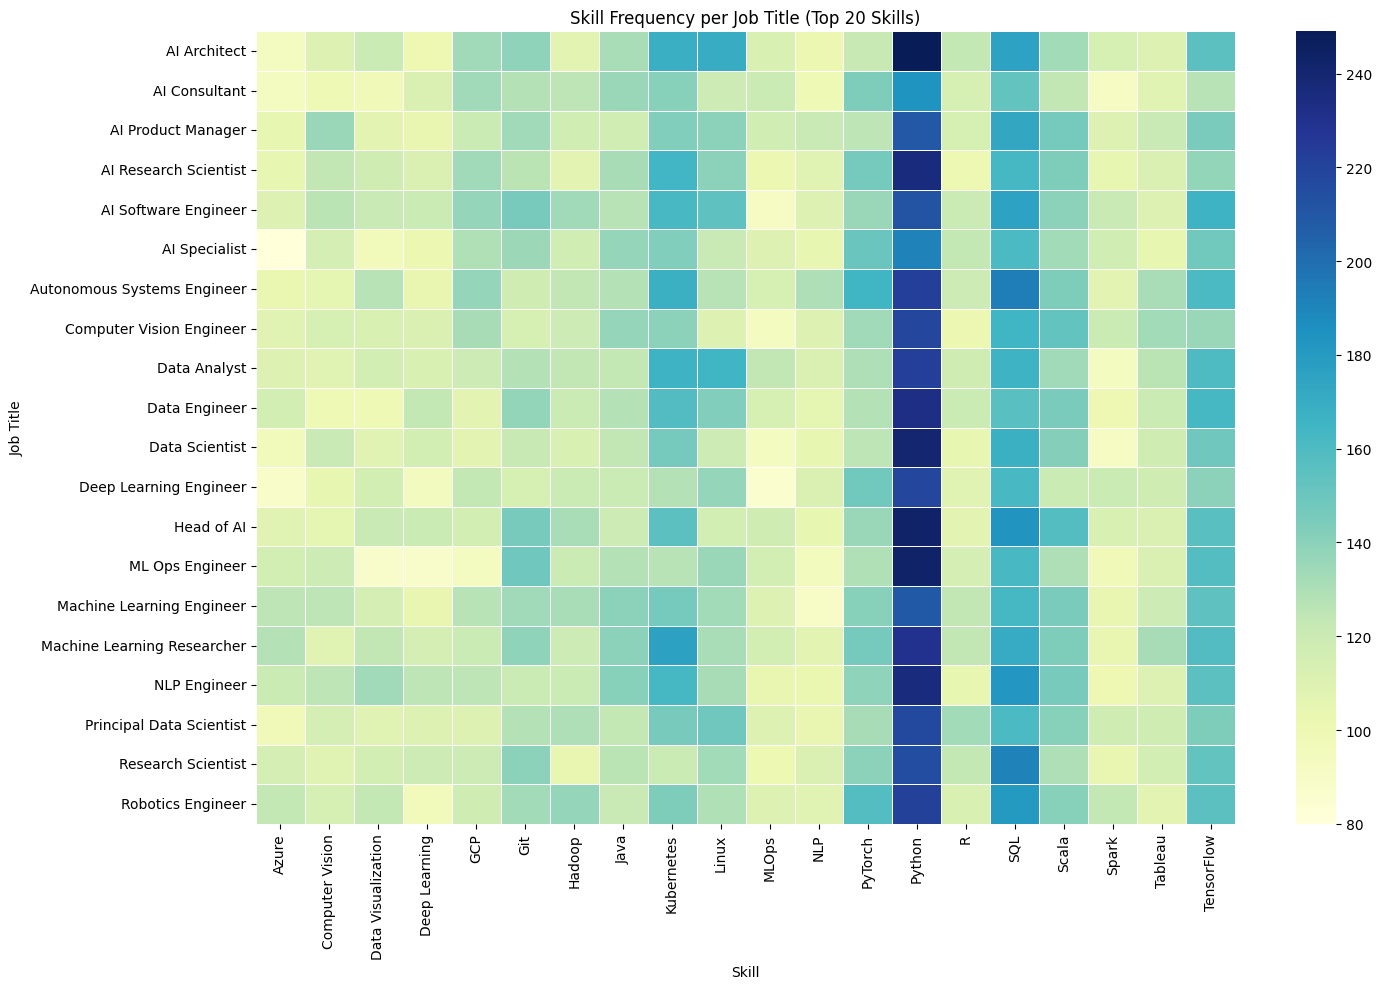

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare DataFrame from your nested dict job_skill_counts
rows = []
for job_title, skills in job_skill_counts.items():
    for skill, count in skills.items():
        rows.append({"job_title": job_title, "skill": skill, "count": count})

skills_df = pd.DataFrame(rows)

# Pick top 20 skills overall for clarity in heatmap
top_skills = skills_df.groupby('skill')['count'].sum().nlargest(20).index

# Filter for those top skills
filtered_df = skills_df[skills_df['skill'].isin(top_skills)]

# Pivot to matrix format: rows = job_title, columns = skill, values = count
pivot_df = filtered_df.pivot_table(index='job_title', columns='skill', values='count', fill_value=0)

# Plot heatmap
plt.figure(figsize=(15,10))
sns.heatmap(pivot_df, cmap='YlGnBu', linewidths=0.5)
plt.title('Skill Frequency per Job Title (Top 20 Skills)')
plt.xlabel('Skill')
plt.ylabel('Job Title')
plt.tight_layout()
plt.show()


In [7]:
import pandas as pd
import plotly.express as px
from collections import defaultdict, Counter
import os
import ipywidgets as widgets
from IPython.display import display, clear_output


# ----------- Skill Categories -----------
skill_categories = {
    'NLP': 'AI/ML', 'Deep Learning': 'AI/ML', 'Computer Vision': 'AI/ML',
    'TensorFlow': 'AI/ML', 'PyTorch': 'AI/ML', 'MLOps': 'AI/ML',
    'SQL': 'Big Data', 'Hadoop': 'Big Data', 'Spark': 'Big Data', 'Scala': 'Big Data',
    'AWS': 'Cloud/DevOps', 'Azure': 'Cloud/DevOps', 'GCP': 'Cloud/DevOps',
    'Docker': 'Cloud/DevOps', 'Kubernetes': 'Cloud/DevOps', 'Git': 'Cloud/DevOps', 'Linux': 'Cloud/DevOps',
    'Python': 'Programming', 'Java': 'Programming', 'R': 'Programming',
    'Tableau': 'Visualization', 'Data Visualization': 'Visualization', 'Excel': 'Visualization',
    'Statistics': 'Math/Stats', 'Mathematics': 'Math/Stats',
}

def categorize(skill):
    return skill_categories.get(skill, 'Other')

# ----------- Count skills per job -----------
job_skill_counts = defaultdict(Counter)
for _, row in df.iterrows():
    job_title = row["job_title"]
    skills = [skill.strip() for skill in row["required_skills"].split(',')]
    job_skill_counts[job_title].update(skills)

rows = []
for job_title, skills in job_skill_counts.items():
    for skill, count in skills.items():
        rows.append({
            "job_title": job_title,
            "skill": skill,
            "count": count,
            "category": categorize(skill)
        })

skills_df = pd.DataFrame(rows)
job_titles = sorted(skills_df['job_title'].unique())

# ----------- 1. Interactive Dropdown in Notebook -----------
dropdown = widgets.Dropdown(options=job_titles, description='Job Title:')
output = widgets.Output()

def show_plot(job_title):
    filtered = skills_df[skills_df['job_title'] == job_title].copy()
    filtered.sort_values(by='count', ascending=True, inplace=True)
    fig = px.bar(
        filtered, x='count', y='skill', color='category',
        orientation='h', title=f'Skills for {job_title}',
        height=600, template='plotly_white',
        color_discrete_sequence=px.colors.qualitative.Set2
    )
    fig.update_layout(margin=dict(l=120, r=40, t=60, b=40), yaxis={'categoryorder': 'total ascending'})
    with output:
        clear_output(wait=True)
        fig.show()

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        show_plot(change['new'])

dropdown.observe(on_change)
display(dropdown, output)
show_plot(dropdown.value)

# ----------- 2. Generate Offline HTML Dashboard -----------
output_dir = "job_skill_plots"
os.makedirs(output_dir, exist_ok=True)

for job_title in job_titles:
    filtered = skills_df[skills_df['job_title'] == job_title].copy()
    filtered.sort_values(by='count', ascending=True, inplace=True)

    fig = px.bar(
        filtered,
        x='count',
        y='skill',
        color='category',
        orientation='h',
        title=f'Skill Counts for \"{job_title}\"',
        labels={'count': 'Count', 'skill': 'Skill', 'category': 'Category'},
        height=600,
        template='plotly_white',
        color_discrete_sequence=px.colors.qualitative.Set2
    )

    fig.update_layout(
        transition=dict(duration=600, easing='cubic-in-out'),
        margin=dict(l=120, r=40, t=60, b=40),
        legend_title_text='Skill Category',
        yaxis={'categoryorder': 'total ascending'}
    )

    safe_title = job_title.replace(" ", "_").replace("/", "-")
    fig.write_html(f"{output_dir}/{safe_title}.html")

default_job = job_titles[0]
default_file = default_job.replace(" ", "_").replace("/", "-") + ".html"

html_path = "skill_dashboard.html"
with open(html_path, "w", encoding="utf-8") as f:
    f.write(f"""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Job Skill Dashboard</title>
    <style>
        body {{ font-family: sans-serif; padding: 20px; }}
        select {{ font-size: 1rem; padding: 5px; margin-bottom: 20px; }}
        iframe {{ width: 100%; height: 700px; border: none; }}
    </style>
</head>
<body>
    <h1>Job Skill Dashboard</h1>
    <label for="jobSelect">Select Job Title:</label>
    <select id="jobSelect">
        {''.join([f'<option value="{job.replace(" ", "_").replace("/", "-")}.html">{job}</option>' for job in job_titles])}
    </select>
    <iframe id="plotFrame" src="{output_dir}/{default_file}"></iframe>

    <script>
        const dropdown = document.getElementById('jobSelect');
        const iframe = document.getElementById('plotFrame');
        dropdown.addEventListener('change', () => {{
            iframe.src = "{output_dir}/" + dropdown.value;
        }});
    </script>
</body>
</html>
""")

print(f"\n✅ Dashboard created: {html_path}")
print(f"✅ Plot HTML files saved in folder: {output_dir}")


Dropdown(description='Job Title:', options=('AI Architect', 'AI Consultant', 'AI Product Manager', 'AI Researc…

Output()


✅ Dashboard created: skill_dashboard.html
✅ Plot HTML files saved in folder: job_skill_plots
